<a href="https://colab.research.google.com/github/mseoulum/AIFFEL_Quest/blob/main/%EC%8B%A0%EC%9A%A9%EA%B1%B0%EB%9E%98_%EC%9D%B4%EC%83%81%ED%83%90%EC%A7%80_%EB%8D%B0%EC%9D%B4%ED%84%B0(240619)_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 사기 거래 여부 예측 프로젝트


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
fraud = pd.read_csv('/content/drive/MyDrive/fraud.csv')

In [4]:
pd.set_option('display.max_columns', 30)

In [5]:
fraud.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0


In [6]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  491134 non-null  object 
 1   cc_num                 491134 non-null  int64  
 2   merchant               491134 non-null  object 
 3   category               491134 non-null  object 
 4   amt                    491134 non-null  float64
 5   first                  491134 non-null  object 
 6   last                   491134 non-null  object 
 7   gender                 491134 non-null  object 
 8   street                 491134 non-null  object 
 9   city                   491134 non-null  object 
 10  state                  491134 non-null  object 
 11  zip                    491134 non-null  int64  
 12  lat                    491134 non-null  float64
 13  long                   491134 non-null  float64
 14  city_pop               491134 non-nu

In [7]:
fraud.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,4.911340e+05,491134.000000,491134.000000,491134.000000,491134.000000,4.911340e+05,4.911340e+05,491134.000000,491134.000000,491134.000000
mean,3.706013e+17,69.050120,50770.532384,37.931230,-90.495619,1.213922e+05,1.358730e+09,37.930272,-90.495411,0.002533
std,1.260229e+18,160.322867,26854.947965,5.341193,12.990732,3.725751e+05,1.819402e+07,5.372986,13.004100,0.050264
min,5.038744e+11,1.000000,1843.000000,24.655700,-122.345600,4.600000e+01,1.325376e+09,23.655789,-123.345106,0.000000
25%,2.131124e+14,8.960000,28405.000000,33.746700,-97.235100,1.228000e+03,1.343087e+09,33.781388,-96.984814,0.000000
50%,3.531130e+15,42.170000,49628.000000,38.507200,-87.591700,5.760000e+03,1.357257e+09,38.545124,-87.573441,0.000000
75%,4.653879e+15,80.330000,75048.000000,41.520500,-80.731000,5.083500e+04,1.374626e+09,41.624294,-80.685567,0.000000
max,4.956829e+18,25086.940000,99323.000000,48.887800,-69.965600,2.906700e+06,1.388534e+09,49.887523,-68.965624,1.000000


# 사기거래 여부를 예측하는데 불필요한 컬럼 제거

In [8]:
# 컬럼 이름 변경
fraud.columns = ['trans_time', 'card_number', 'merchant_info', 'category', 'amount', 'first_name', 'last_name',
                 'gender', 'street', 'city', 'state', 'zip_code', 'latitude', 'longitude', 'city_population',
                 'occupation', 'date_of_birth', 'transaction_number', 'unix_time', 'merchant_latitude',
                 'merchant_longitude', 'is_fraud']

In [9]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trans_time          491134 non-null  object 
 1   card_number         491134 non-null  int64  
 2   merchant_info       491134 non-null  object 
 3   category            491134 non-null  object 
 4   amount              491134 non-null  float64
 5   first_name          491134 non-null  object 
 6   last_name           491134 non-null  object 
 7   gender              491134 non-null  object 
 8   street              491134 non-null  object 
 9   city                491134 non-null  object 
 10  state               491134 non-null  object 
 11  zip_code            491134 non-null  int64  
 12  latitude            491134 non-null  float64
 13  longitude           491134 non-null  float64
 14  city_population     491134 non-null  int64  
 15  occupation          491134 non-nul

In [10]:
# 사기거래를 예측하는데 별로 도움이 될 것 같지 않은 컬럼들
columns_to_drop = ['first_name', 'last_name', 'street', 'city', 'state', 'zip_code', 'latitude', 'longitude', 'transaction_number']
fraud_drop= fraud.drop(columns=columns_to_drop)

In [11]:
fraud_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trans_time          491134 non-null  object 
 1   card_number         491134 non-null  int64  
 2   merchant_info       491134 non-null  object 
 3   category            491134 non-null  object 
 4   amount              491134 non-null  float64
 5   gender              491134 non-null  object 
 6   city_population     491134 non-null  int64  
 7   occupation          491134 non-null  object 
 8   date_of_birth       491134 non-null  object 
 9   unix_time           491134 non-null  int64  
 10  merchant_latitude   491134 non-null  float64
 11  merchant_longitude  491134 non-null  float64
 12  is_fraud            491134 non-null  int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 48.7+ MB


# 결측치 제거

In [12]:
# 결측치 확인
fraud_drop.isna().mean()

trans_time            0.0
card_number           0.0
merchant_info         0.0
category              0.0
amount                0.0
gender                0.0
city_population       0.0
occupation            0.0
date_of_birth         0.0
unix_time             0.0
merchant_latitude     0.0
merchant_longitude    0.0
is_fraud              0.0
dtype: float64

# 이상치 감지
- 수치형 변수들에 대해 처리(amount, city_popuation, merchant_latitude, merchant_longitude)
- 범주형 변수들(category, gender, merchant_info, occupation 등)에는 x
- card_number, trans_time, if_fraud 불필요

## amount

In [13]:
fraud_drop['amount'].describe()

count    491134.000000
mean         69.050120
std         160.322867
min           1.000000
25%           8.960000
50%          42.170000
75%          80.330000
max       25086.940000
Name: amount, dtype: float64

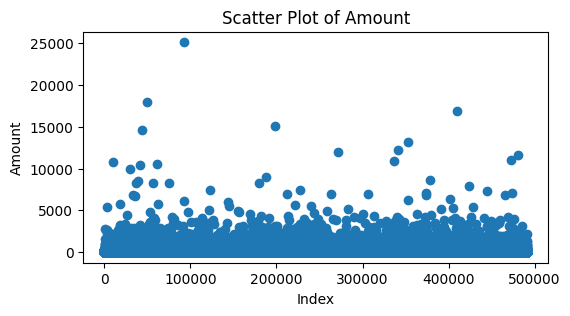

In [14]:
# amount 컬럼의 이상치를 확인하기 위한 scatter plot
plt.figure(figsize=(6, 3))
plt.scatter(fraud_drop.index, fraud_drop['amount'])
plt.title('Scatter Plot of Amount')
plt.xlabel('Index')
plt.ylabel('Amount')
plt.show()

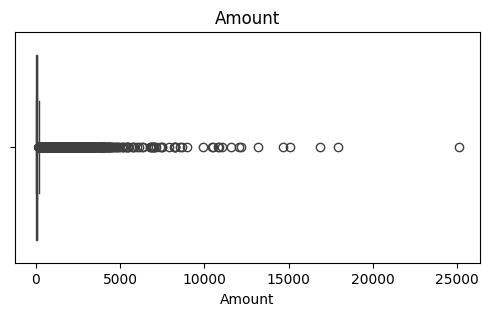

In [15]:
# amount 컬럼의 이상치를 확인하기 위한 box plot
plt.figure(figsize=(6, 3))
sns.boxplot(x=fraud_drop['amount'])
plt.title('Amount')
plt.xlabel('Amount')
plt.show()

In [16]:
# IQR을 이용한 이상치 처리
Q1 = fraud_drop['amount'].quantile(0.25)
Q3 = fraud_drop['amount'].quantile(0.75)
IQR = Q3 - Q1

In [17]:
# IQR 범위 밖의 이상치 제거
fraud_cleaned = fraud_drop[~((fraud_drop['amount'] < (Q1 - 1.5 * IQR)) | (fraud_drop['amount'] > (Q3 + 1.5 * IQR)))]

In [18]:
# 결과확인
print(f'Amount 컬럼 - 이상치 제거 전: {fraud_drop.shape[0]}, 이상치 제거 후: {fraud_cleaned.shape[0]}')

Amount 컬럼 - 이상치 제거 전: 491134, 이상치 제거 후: 456334


## city_population

In [19]:
fraud_drop['city_population'].describe()

count    4.911340e+05
mean     1.213922e+05
std      3.725751e+05
min      4.600000e+01
25%      1.228000e+03
50%      5.760000e+03
75%      5.083500e+04
max      2.906700e+06
Name: city_population, dtype: float64

In [20]:
# 일반 숫자형식으로 표시
pd.options.display.float_format = '{:,.0f}'.format
print(fraud_drop['city_population'].describe())
# pd.reset_option('display.float_format')

count     491,134
mean      121,392
std       372,575
min            46
25%         1,228
50%         5,760
75%        50,835
max     2,906,700
Name: city_population, dtype: float64


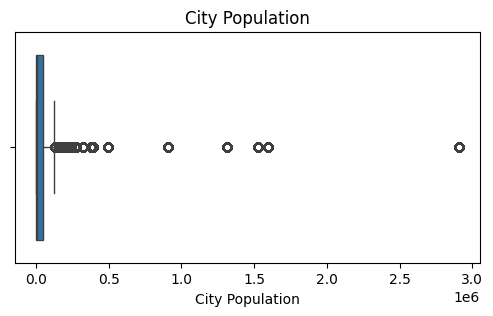

In [21]:
# city_population 컬럼의 이상치를 확인하기 위한 box plot
plt.figure(figsize=(6, 3))
sns.boxplot(x=fraud_drop['city_population'])
plt.title('City Population')
plt.xlabel('City Population')
plt.show()

In [22]:
# IQR을 이용한 이상치 처리
Q1 = fraud_drop['city_population'].quantile(0.25)
Q3 = fraud_drop['city_population'].quantile(0.75)
IQR = Q3 - Q1

In [23]:
# IQR 범위 밖의 이상치 제거
fraud_cleaned = fraud_drop[~((fraud_drop['city_population'] < (Q1 - 1.5 * IQR)) | (fraud_drop['city_population'] > (Q3 + 1.5 * IQR)))]

In [24]:
# 결과확인
print(f'City Population 컬럼 - 이상치 제거 전: {fraud_drop.shape[0]}, 이상치 제거 후: {fraud_cleaned.shape[0]}')

City Population 컬럼 - 이상치 제거 전: 491134, 이상치 제거 후: 405762


## merchant_latitude

In [25]:
fraud_drop['merchant_latitude'].describe()

count   491,134
mean         38
std           5
min          24
25%          34
50%          39
75%          42
max          50
Name: merchant_latitude, dtype: float64

In [26]:
fraud_drop['merchant_latitude'].sort_values().tail(10)

480688   50
311281   50
335513   50
132851   50
193764   50
477078   50
14326    50
60026    50
278569   50
184036   50
Name: merchant_latitude, dtype: float64

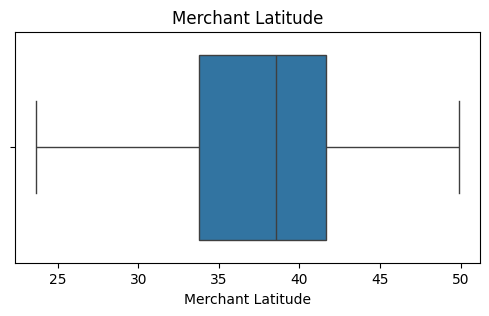

In [27]:
# merchant_latitude 컬럼의 이상치를 확인하기 위한 box plot
plt.figure(figsize=(6, 3))
sns.boxplot(x=fraud_drop['merchant_latitude'])
plt.title('Merchant Latitude')
plt.xlabel('Merchant Latitude')
plt.show()

In [28]:
# 이상치에 거의 문제가 없어보이나 엄격한 기준 적용을 위해 동일하게 IQR 적용
# IQR을 이용한 이상치 처리
Q1 = fraud_drop['merchant_latitude'].quantile(0.25)
Q3 = fraud_drop['merchant_latitude'].quantile(0.75)
IQR = Q3 - Q1

In [29]:
# IQR 범위 밖의 이상치 제거
fraud_cleaned = fraud_drop[~((fraud_drop['merchant_latitude'] < (Q1 - 1.5 * IQR)) | (fraud_drop['merchant_latitude'] > (Q3 + 1.5 * IQR)))]

In [30]:
# 결과확인
print(f'Merchant Latitude 컬럼 - 이상치 제거 전: {fraud_drop.shape[0]}, 이상치 제거 후: {fraud_cleaned.shape[0]}')

Merchant Latitude 컬럼 - 이상치 제거 전: 491134, 이상치 제거 후: 491134


## merchant_longitude

In [31]:
fraud_drop['merchant_longitude'].describe()

count   491,134
mean        -90
std          13
min        -123
25%         -97
50%         -88
75%         -81
max         -69
Name: merchant_longitude, dtype: float64

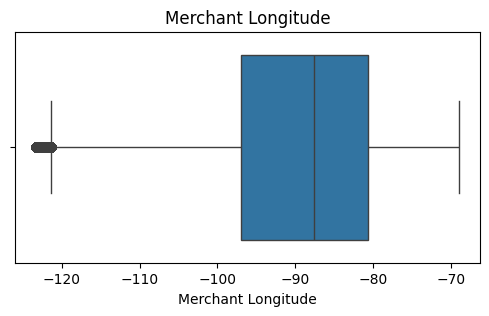

In [32]:
# merchant_longitude 컬럼의 이상치를 확인하기 위한 box plot
plt.figure(figsize=(6, 3))
sns.boxplot(x=fraud_drop['merchant_longitude'])
plt.title('Merchant Longitude')
plt.xlabel('Merchant Longitude')
plt.show()

In [33]:
# IQR을 이용한 이상치 처리
Q1 = fraud_drop['merchant_longitude'].quantile(0.25)
Q3 = fraud_drop['merchant_longitude'].quantile(0.75)
IQR = Q3 - Q1

In [34]:
# IQR 범위 밖의 이상치 제거
fraud_cleaned = fraud_drop[~((fraud_drop['merchant_longitude'] < (Q1 - 1.5 * IQR)) | (fraud_drop['merchant_longitude'] > (Q3 + 1.5 * IQR)))]

In [35]:
# 결과확인
print(f'Merchant Longitude 컬럼 - 이상치 제거 전: {fraud_drop.shape[0]}, 이상치 제거 후: {fraud_cleaned.shape[0]}')

Merchant Longitude 컬럼 - 이상치 제거 전: 491134, 이상치 제거 후: 484047


In [36]:
fraud_cleaned.head()

,trans_time,card_number,merchant_info,category,amount,gender,city_population,occupation,date_of_birth,unix_time,merchant_latitude,merchant_longitude,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107,F,149,Special educational needs teacher,1978-06-21,1325376044,49,-118,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,45,M,124967,Operational researcher,1980-12-21,1325376754,40,-75,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46,F,71485,Leisure centre manager,1974-07-19,1325377036,40,-74,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64,M,31515,Police officer,1971-11-05,1325377215,42,-84,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,26,F,378909,"Designer, furniture",1977-02-22,1325377421,30,-91,0


In [37]:
# fraud_drop과 비교, 491134 > 484047
fraud_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 484047 entries, 0 to 491133
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trans_time          484047 non-null  object 
 1   card_number         484047 non-null  int64  
 2   merchant_info       484047 non-null  object 
 3   category            484047 non-null  object 
 4   amount              484047 non-null  float64
 5   gender              484047 non-null  object 
 6   city_population     484047 non-null  int64  
 7   occupation          484047 non-null  object 
 8   date_of_birth       484047 non-null  object 
 9   unix_time           484047 non-null  int64  
 10  merchant_latitude   484047 non-null  float64
 11  merchant_longitude  484047 non-null  float64
 12  is_fraud            484047 non-null  int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 51.7+ MB


## 관계 시각화

In [38]:
# 히트맵 그려보기
numeric_data = fraud_cleaned.drop(columns=['trans_time', 'merchant_info', 'category', 'gender', 'occupation', 'date_of_birth'])
corr_matrix = numeric_data.corr()

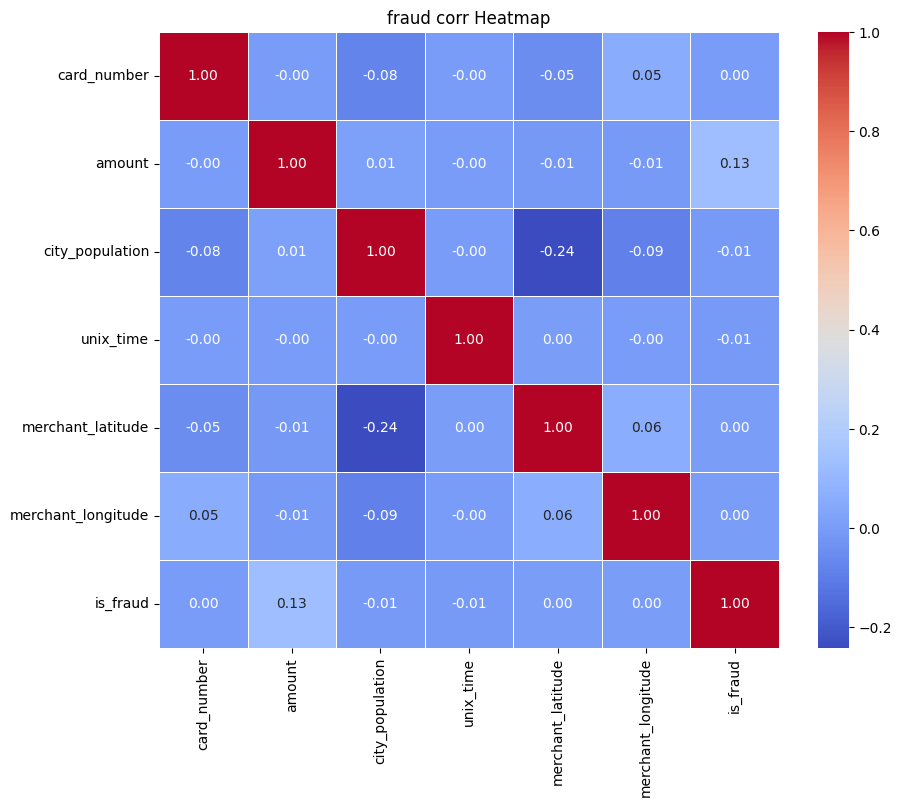

In [39]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('fraud corr Heatmap')
plt.show()
# 거의 상관관계가 없음! 각 변수가 독립 작용 가능성이 큼

In [44]:
# # Pairplot 그려보기
# sns.pairplot(fraud_cleaned[numeric_data.columns], hue='is_fraud', diag_kind='kde')
# plt.show()

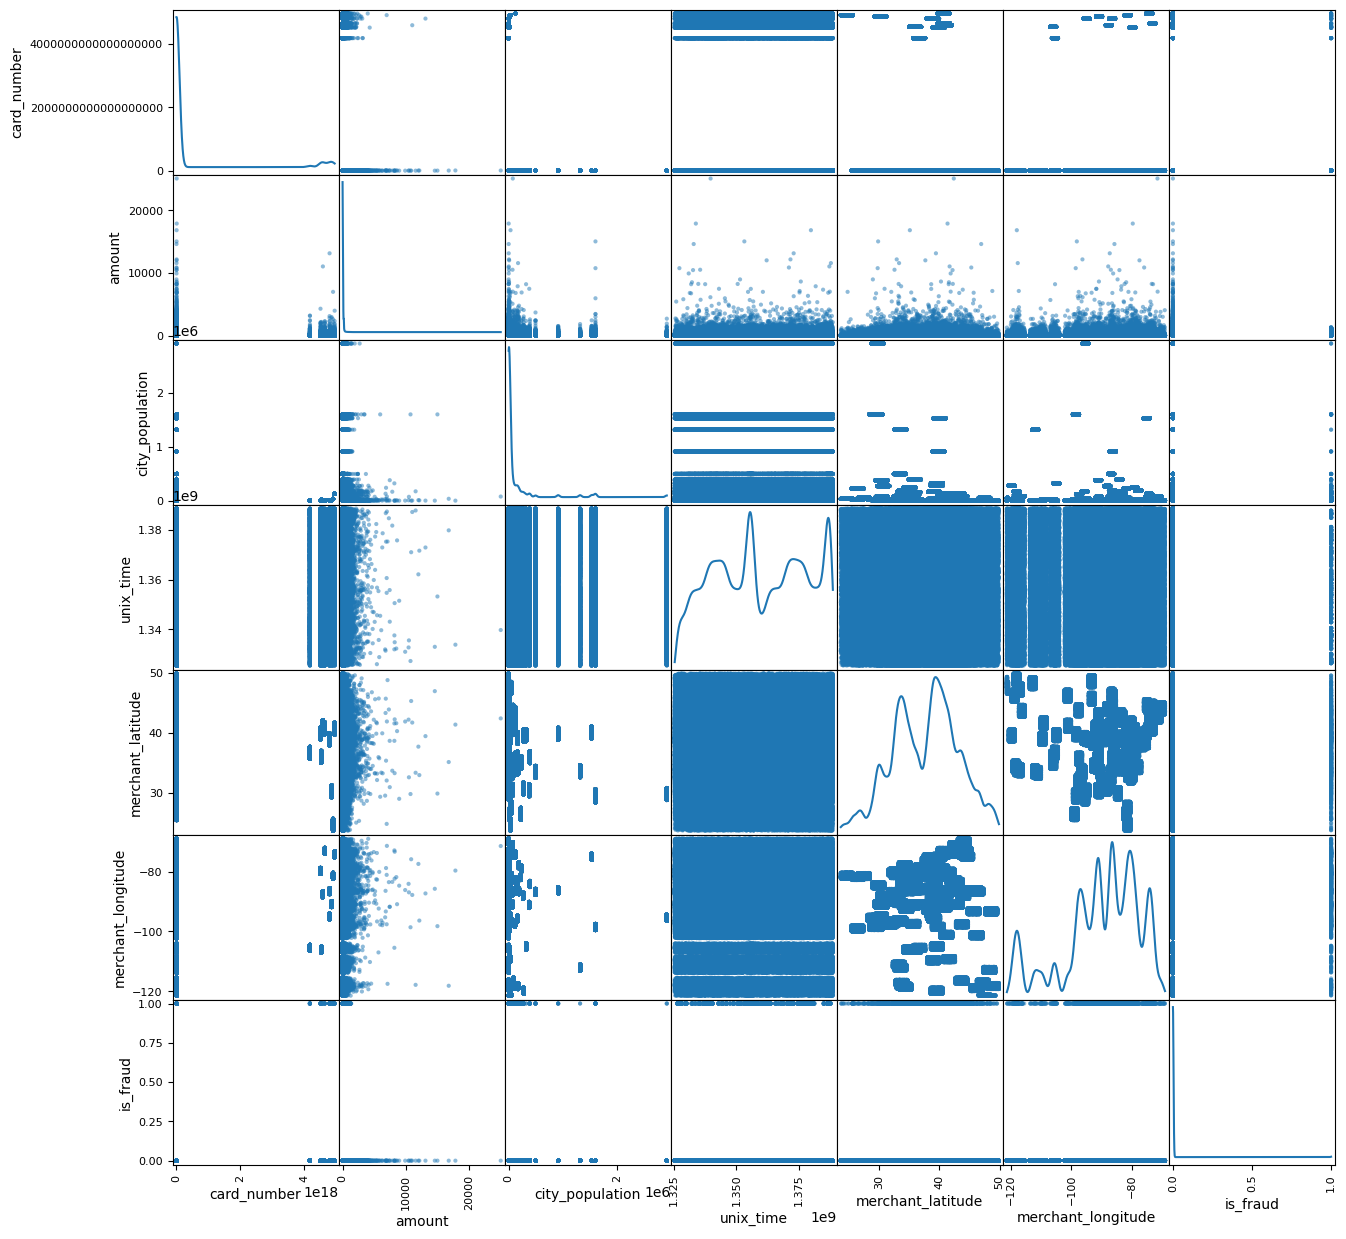

In [43]:
# 산점도 행렬 그려보기
from pandas.plotting import scatter_matrix

scatter_matrix(numeric_data, figsize=(15, 15), diagonal='kde')
plt.show()

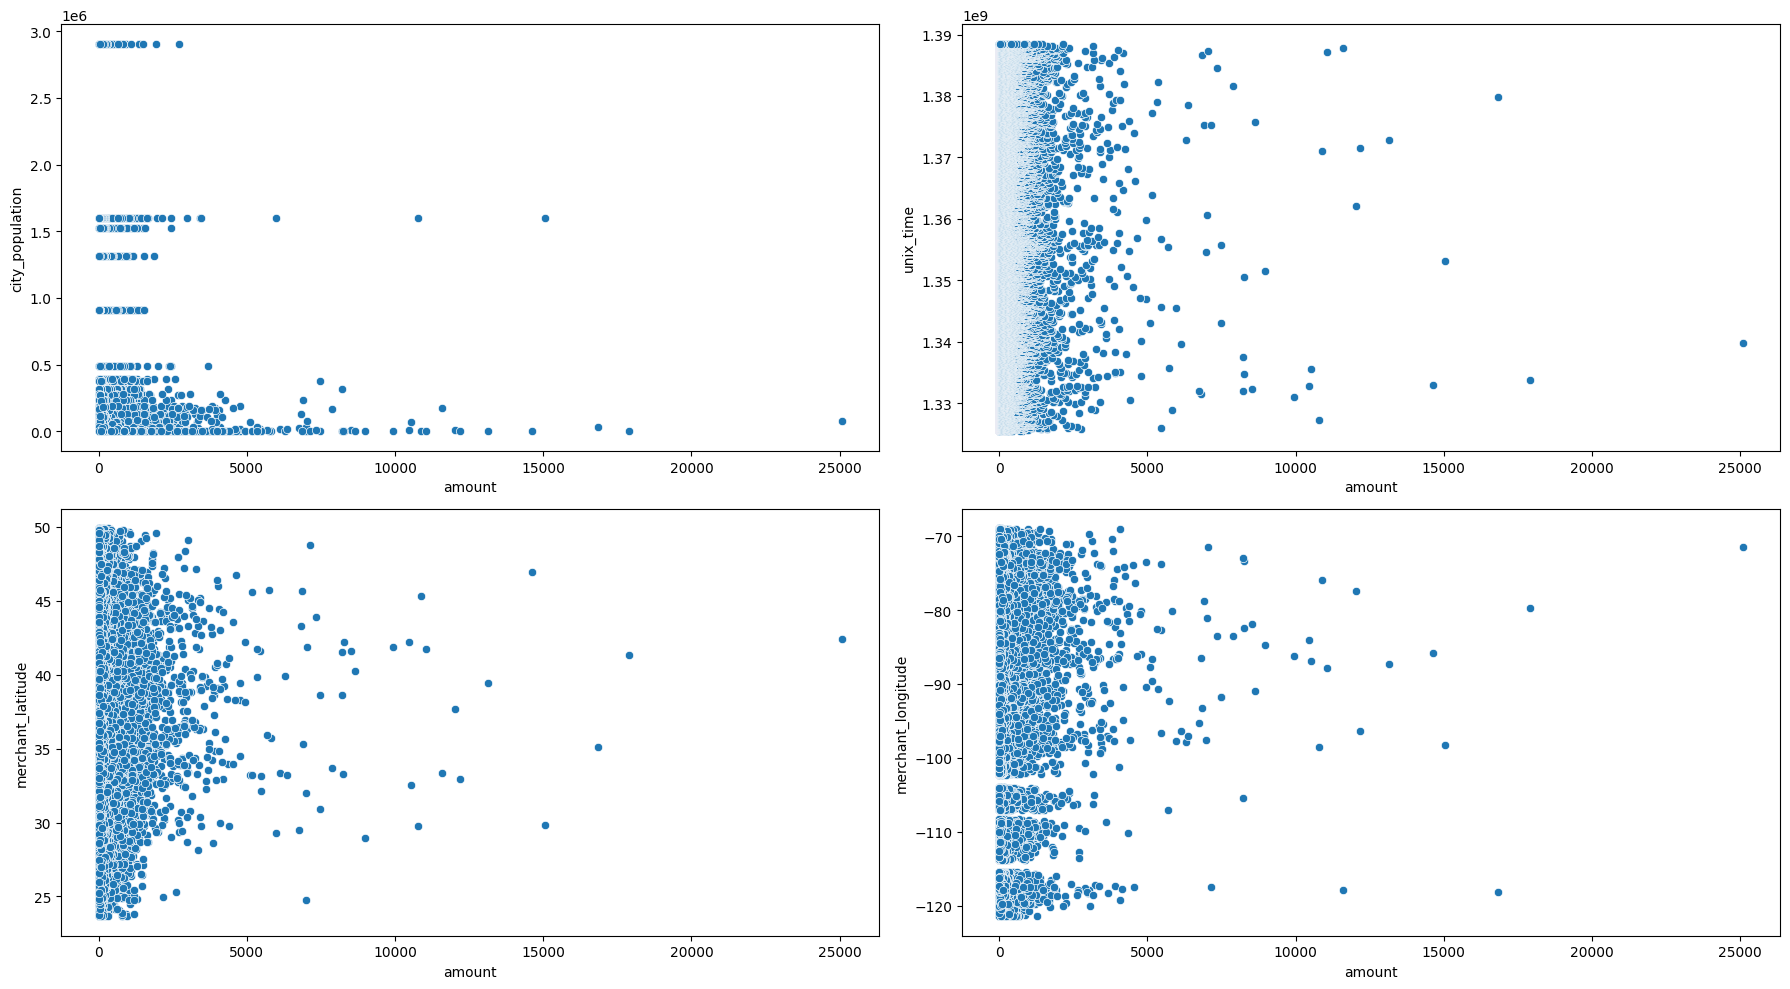

In [45]:
# amount 기준 다른 변수와 관계
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
sns.scatterplot(ax=axes[0, 0], x='amount', y='city_population', data=fraud_cleaned)
sns.scatterplot(ax=axes[0, 1], x='amount', y='unix_time', data=fraud_cleaned)
sns.scatterplot(ax=axes[1, 0], x='amount', y='merchant_latitude', data=fraud_cleaned)
sns.scatterplot(ax=axes[1, 1], x='amount', y='merchant_longitude', data=fraud_cleaned)

plt.tight_layout()
plt.show()

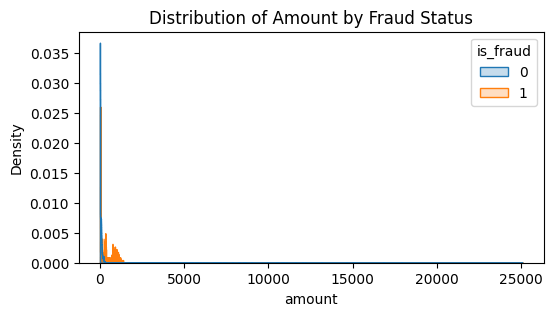

In [46]:
# amount 분포를 is_fraud에 따라 비교
plt.figure(figsize=(6, 3))
sns.histplot(data=fraud_cleaned, x='amount', hue='is_fraud', element='step', stat='density', common_norm=False)
plt.title('Distribution of Amount by Fraud Status')
plt.show()

# 최소 2개 이상의 새로운 피처(변수) 생성

## 구매 시간 변수 이용

In [47]:
fraud_cleaned['trans_time'].tail()

491129    2020-12-31 23:56:48
491130    2020-12-31 23:56:57
491131    2020-12-31 23:59:09
491132    2020-12-31 23:59:15
491133    2020-12-31 23:59:34
Name: trans_time, dtype: object

In [48]:
# trans_time의 데이터타입 확인
fraud_cleaned['trans_time'].dtype

dtype('O')

In [57]:
fraud_cleaned.loc[:, 'trans_time'] = fraud_cleaned['trans_time'].astype(str)

In [70]:
# 문자열 공백 제거 및 형식 변환
fraud_cleaned.loc[:, 'trans_time'] = fraud_cleaned['trans_time'].astype(str).str.strip()

# trans_time 컬럼의 고유한 값 확인
print(fraud_cleaned['trans_time'].unique())

['2019-01-01 00:00:44' '2019-01-01 00:12:34' '2019-01-01 00:17:16' ...
 '2020-12-31 23:59:09' '2020-12-31 23:59:15' '2020-12-31 23:59:34']


In [73]:
# trans_time을 datetime 형식으로 변환
fraud_cleaned['trans_time'] = pd.to_datetime(fraud_cleaned['trans_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

<ipython-input-73-1819e284701b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_cleaned['trans_time'] = pd.to_datetime(fraud_cleaned['trans_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')


In [74]:
fraud_cleaned['trans_time'].dtype

dtype('<M8[ns]')

In [75]:
# 거래 시간에서 시간대 추출
fraud_cleaned.loc[:, 'transaction_hour'] = fraud_cleaned['trans_time'].dt.hour

<ipython-input-75-a5fe5551a429>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_cleaned.loc[:, 'transaction_hour'] = fraud_cleaned['trans_time'].dt.hour


In [76]:
# transaction_hour 확인
print(fraud_cleaned[['trans_time', 'transaction_hour']].tail())

                trans_time  transaction_hour
491129 2020-12-31 23:56:48                23
491130 2020-12-31 23:56:57                23
491131 2020-12-31 23:59:09                23
491132 2020-12-31 23:59:15                23
491133 2020-12-31 23:59:34                23


In [77]:
# date_of_birth 데이터 타입 확인
fraud_cleaned['date_of_birth'].dtype

dtype('O')

In [78]:
# 문자열 형식으로 변환
fraud_cleaned.loc[:, 'date_of_birth'] = fraud_cleaned['date_of_birth'].astype(str)

In [79]:
# 문자열 공백 제거
fraud_cleaned.loc[:, 'date_of_birth'] = fraud_cleaned['date_of_birth'].str.strip()

In [80]:
fraud_cleaned['date_of_birth'] = pd.to_datetime(fraud_cleaned['date_of_birth'], errors='coerce')

<ipython-input-80-f9db96cd5e4b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_cleaned['date_of_birth'] = pd.to_datetime(fraud_cleaned['date_of_birth'], errors='coerce')


In [81]:
fraud_cleaned['date_of_birth'].dtype

dtype('<M8[ns]')

In [82]:
# 생년월일에서 나이 추출
fraud_cleaned.loc[:, 'age'] = 2024 - fraud_cleaned['date_of_birth'].dt.year

<ipython-input-82-741049bee7eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_cleaned.loc[:, 'age'] = 2024 - fraud_cleaned['date_of_birth'].dt.year


In [83]:
fraud_cleaned[['date_of_birth', 'age']].head()

,date_of_birth,age
0,1978-06-21,46
1,1980-12-21,44
2,1974-07-19,50
3,1971-11-05,53
4,1977-02-22,47


In [84]:
# 연령대별로 생성
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66+']
fraud_cleaned.loc[:, 'age_group'] = pd.cut(fraud_cleaned['age'], bins=bins, labels=labels)

<ipython-input-84-0685a2f30a89>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_cleaned.loc[:, 'age_group'] = pd.cut(fraud_cleaned['age'], bins=bins, labels=labels)


In [85]:
fraud_cleaned[['date_of_birth', 'age', 'age_group']].head()

,date_of_birth,age,age_group
0,1978-06-21,46,46-55
1,1980-12-21,44,36-45
2,1974-07-19,50,46-55
3,1971-11-05,53,46-55
4,1977-02-22,47,46-55


In [86]:
fraud_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 484047 entries, 0 to 491133
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   trans_time          484047 non-null  datetime64[ns]
 1   card_number         484047 non-null  int64         
 2   merchant_info       484047 non-null  object        
 3   category            484047 non-null  object        
 4   amount              484047 non-null  float64       
 5   gender              484047 non-null  object        
 6   city_population     484047 non-null  int64         
 7   occupation          484047 non-null  object        
 8   date_of_birth       484047 non-null  datetime64[ns]
 9   unix_time           484047 non-null  int64         
 10  merchant_latitude   484047 non-null  float64       
 11  merchant_longitude  484047 non-null  float64       
 12  is_fraud            484047 non-null  int64         
 13  transaction_hour    484047 non-nul

In [87]:
# date_of_birth 컬럼 제거
fraud_cleaned = fraud_cleaned.drop(columns=['date_of_birth'], errors='ignore')

In [88]:
fraud_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 484047 entries, 0 to 491133
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   trans_time          484047 non-null  datetime64[ns]
 1   card_number         484047 non-null  int64         
 2   merchant_info       484047 non-null  object        
 3   category            484047 non-null  object        
 4   amount              484047 non-null  float64       
 5   gender              484047 non-null  object        
 6   city_population     484047 non-null  int64         
 7   occupation          484047 non-null  object        
 8   unix_time           484047 non-null  int64         
 9   merchant_latitude   484047 non-null  float64       
 10  merchant_longitude  484047 non-null  float64       
 11  is_fraud            484047 non-null  int64         
 12  transaction_hour    484047 non-null  int32         
 13  age                 484047 non-nul

In [89]:
# 시간대를 4개의 범주로 나눠보기
bins_time = [0, 6, 12, 18, 24]
labels_time = ['0-5', '6-11', '12-17', '18-23']
fraud_cleaned['time_of_day'] = pd.cut(fraud_cleaned['transaction_hour'], bins=bins_time, labels=labels_time, right=False)

In [90]:
# 나이를 4구간으로 나눠보기
bins_age_group = [0, 18, 35, 55, 100]
labels_age_group = ['청소년', '성인', '중년', '노년']
fraud_cleaned['age_category'] = pd.cut(fraud_cleaned['age'], bins=bins_age_group, labels=labels_age_group)

In [91]:
# 특정 연령대가 특정 시간대에 주로 구매하는지
fraud_cleaned['age_time_group'] = fraud_cleaned['age_group'].astype(str) + '_' + fraud_cleaned['transaction_hour'].astype(str)

In [92]:
# 구매가 주중/주말 중 언제 이루어졌는지
fraud_cleaned['day_of_week'] = fraud_cleaned['trans_time'].dt.dayofweek
fraud_cleaned['weekend'] = fraud_cleaned['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

In [93]:
# 피크 시간대는?
fraud_cleaned['peak_hour'] = fraud_cleaned['transaction_hour'].apply(lambda x: 1 if (12 <= x < 14) or (18 <= x < 20) else 0)

In [94]:
# 결과 확인
fraud_cleaned[['trans_time', 'transaction_hour','age', 'age_group', 'time_of_day', 'age_category', 'age_time_group', 'weekend', 'peak_hour']].tail()

,trans_time,transaction_hour,age,age_group,time_of_day,age_category,age_time_group,weekend,peak_hour
491129,2020-12-31 23:56:48,23,41,36-45,18-23,중년,36-45_23,0,0
491130,2020-12-31 23:56:57,23,40,36-45,18-23,중년,36-45_23,0,0
491131,2020-12-31 23:59:09,23,25,19-25,18-23,성인,19-25_23,0,0
491132,2020-12-31 23:59:15,23,43,36-45,18-23,중년,36-45_23,0,0
491133,2020-12-31 23:59:34,23,31,26-35,18-23,성인,26-35_23,0,0


## 금액 변수 이용

In [95]:
# 거래 금액 범주화
bins_amount = [0, 20, 50, 100, 500, 1000, 5000, np.inf]
labels_amount = ['0-20', '20-50', '50-100', '100-500', '500-1000', '1000-5000', '5000+']
fraud_cleaned['amount_group'] = pd.cut(fraud_cleaned['amount'], bins=bins_amount, labels=labels_amount)

In [96]:
# 거래 금액 로그 변환
fraud_cleaned['log_amount'] = np.log1p(fraud_cleaned['amount'])

In [97]:
fraud_cleaned.head()

,trans_time,card_number,merchant_info,category,amount,gender,city_population,occupation,unix_time,merchant_latitude,merchant_longitude,is_fraud,transaction_hour,age,age_group,time_of_day,age_category,age_time_group,day_of_week,weekend,peak_hour,amount_group,log_amount
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107,F,149,Special educational needs teacher,1325376044,49,-118,0,0,46,46-55,0-5,중년,46-55_0,1,0,0,100-500,5
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,45,M,124967,Operational researcher,1325376754,40,-75,0,0,44,36-45,0-5,중년,36-45_0,1,0,0,20-50,4
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46,F,71485,Leisure centre manager,1325377036,40,-74,0,0,50,46-55,0-5,중년,46-55_0,1,0,0,20-50,4
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64,M,31515,Police officer,1325377215,42,-84,0,0,53,46-55,0-5,중년,46-55_0,1,0,0,50-100,4
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,26,F,378909,"Designer, furniture",1325377421,30,-91,0,0,47,46-55,0-5,중년,46-55_0,1,0,0,20-50,3


In [98]:
fraud_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 484047 entries, 0 to 491133
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   trans_time          484047 non-null  datetime64[ns]
 1   card_number         484047 non-null  int64         
 2   merchant_info       484047 non-null  object        
 3   category            484047 non-null  object        
 4   amount              484047 non-null  float64       
 5   gender              484047 non-null  object        
 6   city_population     484047 non-null  int64         
 7   occupation          484047 non-null  object        
 8   unix_time           484047 non-null  int64         
 9   merchant_latitude   484047 non-null  float64       
 10  merchant_longitude  484047 non-null  float64       
 11  is_fraud            484047 non-null  int64         
 12  transaction_hour    484047 non-null  int32         
 13  age                 484047 non-nul

# 예측

In [120]:
# 범주형 변수 원핫인코딩
fraud_encoded = pd.get_dummies(fraud_cleaned, columns=[
    'category', 'gender', 'age_group', 'time_of_day',
    'age_category', 'age_time_group', 'amount_group',
    'merchant_info', 'occupation'
], drop_first=True)

In [121]:
# 확인
fraud_encoded.head()

,trans_time,card_number,amount,city_population,unix_time,merchant_latitude,merchant_longitude,is_fraud,transaction_hour,age,day_of_week,weekend,peak_hour,log_amount,category_food_dining,...,"occupation_Surveyor, land/geomatics","occupation_Surveyor, minerals","occupation_Surveyor, rural practice",occupation_Systems developer,occupation_Tax inspector,occupation_Television production assistant,"occupation_Therapist, art","occupation_Therapist, sports",occupation_Tourism officer,occupation_Town planner,occupation_Toxicologist,occupation_Trade mark attorney,occupation_Travel agency manager,occupation_Tree surgeon,occupation_Water engineer
0,2019-01-01 00:00:44,630423337322,107,149,1325376044,49,-118,0,0,46,1,0,0,5,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2019-01-01 00:12:34,4956828990005111019,45,124967,1325376754,40,-75,0,0,44,1,0,0,4,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2019-01-01 00:17:16,180048185037117,46,71485,1325377036,40,-74,0,0,50,1,0,0,4,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,2019-01-01 00:20:15,374930071163758,64,31515,1325377215,42,-84,0,0,53,1,0,0,4,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,2019-01-01 00:23:41,2712209726293386,26,378909,1325377421,30,-91,0,0,47,1,0,0,3,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [111]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [112]:
X = fraud_encoded.drop(columns=['is_fraud', 'trans_time'])
y = fraud_encoded['is_fraud']

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [114]:
print(f'훈련 세트 크기: {X_train.shape}')
print(f'테스트 세트 크기: {X_test.shape}')

훈련 세트 크기: (338832, 940)
테스트 세트 크기: (145215, 940)


In [115]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [116]:
y_pred_rf = rf_model.predict(X_test)

In [117]:
print(f'랜덤 포레스트 모델 정확도: {accuracy_score(y_test, y_pred_rf)}')
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

랜덤 포레스트 모델 정확도: 0.9982921874462004
[[144820     12]
 [   236    147]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    144832
           1       0.92      0.38      0.54       383

    accuracy                           1.00    145215
   macro avg       0.96      0.69      0.77    145215
weighted avg       1.00      1.00      1.00    145215



# 추가 실습
- 데이터의 위도/경도 정보 활용
- 통계적 관점으로 접근해 유용한 변수 만들기

In [102]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trans_time          491134 non-null  object 
 1   card_number         491134 non-null  int64  
 2   merchant_info       491134 non-null  object 
 3   category            491134 non-null  object 
 4   amount              491134 non-null  float64
 5   first_name          491134 non-null  object 
 6   last_name           491134 non-null  object 
 7   gender              491134 non-null  object 
 8   street              491134 non-null  object 
 9   city                491134 non-null  object 
 10  state               491134 non-null  object 
 11  zip_code            491134 non-null  int64  
 12  latitude            491134 non-null  float64
 13  longitude           491134 non-null  float64
 14  city_population     491134 non-null  int64  
 15  occupation          491134 non-nul

In [103]:
# 위도 경도 정보 활용: 구매자 위치와 상점 위치 거리 계산하기
# Euclidean distance 이용
def calculate_distance(lat1, long1, lat2, long2):
    return np.sqrt((lat2 - lat1)**2 + (long2 - long1)**2)

In [104]:
# 구매자 위치와 상점 위치 간의 Euclidean 거리 계산
fraud['distance'] = fraud.apply(
    lambda row: calculate_distance(row['latitude'], row['longitude'], row['merchant_latitude'], row['merchant_longitude']), axis=1
)

In [106]:
fraud[['latitude', 'longitude', 'merchant_latitude', 'merchant_longitude', 'distance']].head()

,latitude,longitude,merchant_latitude,merchant_longitude,distance
0,49,-118,49,-118,0
1,41,-74,40,-75,1
2,41,-74,40,-74,1
3,42,-83,42,-84,0
4,30,-91,30,-91,1


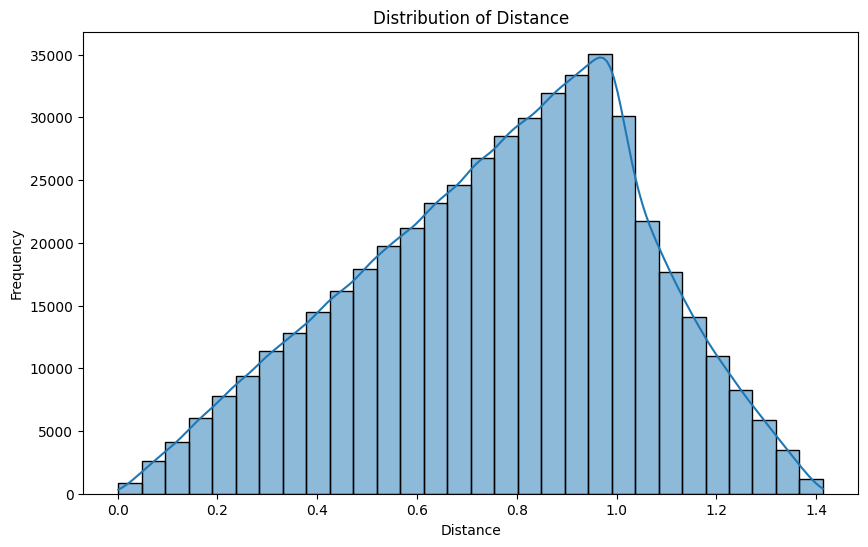

In [133]:
# 시각화
plt.figure(figsize=(10, 6))
sns.histplot(fraud['distance'], bins=30, kde=True)
plt.title('Distribution of Distance')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

In [107]:
# 거리 구간 나누기
bins = [0, 0.1, 0.5, 1, 5, 10, 20, float('inf')]
labels = ['0-0.1', '0.1-0.5', '0.5-1', '1-5', '5-10', '10-20', '20+']
fraud['distance_bin'] = pd.cut(fraud['distance'], bins=bins, labels=labels)

In [128]:
# 결과확인
fraud_rate_by_distance

distance_bin
0-0.1      0.001844
0.1-0.5    0.002473
0.5-1      0.002554
1-5        0.002551
5-10            NaN
10-20           NaN
20+             NaN
Name: is_fraud, dtype: float64

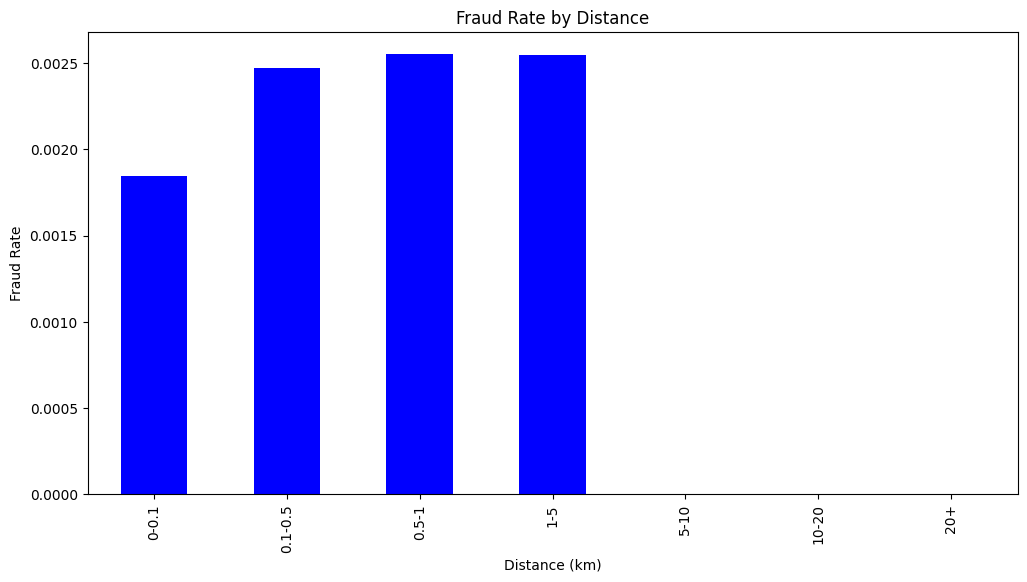

In [129]:
# 거리 범위에 따른 사기 거래 비율 시각화
plt.figure(figsize=(12, 6))
fraud_rate_by_distance.plot(kind='bar', color='blue')
plt.title('Fraud Rate by Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Fraud Rate')
plt.show()

In [130]:
# 상관 관계
correlation = fraud[['euclidean_distance', 'is_fraud']].corr()
print(correlation)

                    euclidean_distance  is_fraud
euclidean_distance             1.00000   0.00053
is_fraud                       0.00053   1.00000
